<a href="https://colab.research.google.com/github/wee270641/Sentiment-Analysis-of-Heterologous-prime-boostCovid-19-Vaccination-in-Thailand-Astra-and-Pfizer-/blob/main/Astra_pfizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install package


In [6]:
!pip install emoji
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## Data Processing

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
sheet1 = pd.read_excel('/content/gdrive/MyDrive/CS701_src/dataset/astra_pfizer.xlsx',sheet_name='Sheet1')

In [12]:
sheet1.shape

(127, 3)

In [13]:
sheet1.head()

,user_name,create_at,text
0,@CCKonna_Ori,"Mar 31, 2022",เด๋วพรุ่งนี้ไปตรวจ RT-PCR คิดว่าน่าจะติดกันหมด...
1,@AKXiaoYaYa,"Mar 20, 2022",คุณหมอคะเราได้รับสูตรไขว้ แอสตร้า+ไฟเซอร์ มาแล...
2,@Snowy4131,"Feb 27, 2022",ต้องรอดูนะ วัคซีนไขว้แอสตร้า ไฟเซอร์ ✌️✌️✌️✌️
3,@SweetHWAN6,"Jan 26, 2022",แม่ฉีดวัคซีนสูตรไขว้แอสตร้า-ไฟเซอร์ วันนี้กำหน...
4,@realleep,"Dec 24, 2021",น้าที่รู้จักกัน แกฉีดวัคซีน ไฟเซอร์ เข็ม 2 สูต...


In [16]:
sheet2 = pd.read_excel('/content/gdrive/MyDrive/CS701_src/dataset/astra_pfizer.xlsx',sheet_name='Sheet2')

In [17]:
sheet2.shape

(7, 3)

In [18]:
sheet2.head()

,user_name,create_at,text
0,@xpace__,"Jan 12, 2022",เข็มแรก แอสตร้า เข็ม 2 ไฟเซอร์ เข็ม 3 โมเดอร์น...
1,@poctober18,"Nov 29, 2021",เหี้ยอยู่นะ มึงประกาศว่าเข็มแรกแอสตร้า เข็ม 2ไ...
2,@_mugrop,"Nov 25, 2021",ที่นี่เข็มแรกแอสตร้าเข็ม2 ไฟเซอร์ กูควรฉีดดีไห...
3,@SSriiiiiii94,"Nov 19, 2021",เชียงใหม่ประกาศเข็มแรกแอสตร้า เข็ม 2 ไฟเซอร์ แ...
4,@TriedtobePolite,"Nov 2, 2021",ใช่ เข็มแรกแอสตร้า เข็ม2 ไฟเซอร์


In [19]:
data1 = sheet1[['text']]
data2 = sheet2[['text']]
data3 = pd.concat([data1,data2])

In [20]:
data3.shape

(134, 1)

# Bag-of-Words

In [21]:
def slash_tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

d_data = data3["text"].dropna()
vectorizer = CountVectorizer(tokenizer=slash_tokenize)
transformed_data = vectorizer.fit_transform(d_data)
hash_tag_cnt_df= pd.DataFrame(columns = ['word', 'count']) 
hash_tag_cnt_df['word'] = vectorizer.get_feature_names()
hash_tag_cnt_df['count'] = np.ravel(transformed_data.sum(axis=0))
hash_tag_cnt_df.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,เกียมเป็น x-men,1
93,หมอยง...รับสมัครอาสาสมัครทดลองวัคซีนโดส 1 กับโ...,1
87,สั่งฉีดไขว้แอสตร้า+ไฟเซอร์ ทำไมก่อน ใครอยากฉีด...,1
88,สูตรไขว้ แอสตร้า+ไฟเซอร์ นี่ขอให้เป็นเราได้มั้...,1
89,สูตรไขว้ แอสตร้า+ไฟเซอร์ มันโอเคมั้ยทุกคน รอบข...,1
90,สูตรไขว้แอสตร้าไฟเซอร์ ฮือๆๆๆๆ สั่น อยากฉีด,1
91,ส่วนต่างจังหวัดก็ยังฉีดไขว้ แอสตร้า ไฟเซอร์😢😢😢,1
92,หมอคะะ วัคซีนไขว้แอสตร้า+ไฟเซอร์ นี่มันมีประสิ...,1
94,อดทนมานานมากเพื่อวัคซีนดี ๆ แต่ดันมาตกม้าตายได...,1
1,"""ฉีดวัคซีนสูตรไขว้"" แอสตร้า-ไฟเซอร์ ""รพ.บางจาก...",1


In [22]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    text = text.replace("%","เปอร์เซ็นต์")
    text = text.replace("ฯ"," ")
    text = text.replace("#"," ")
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in data3["text"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
639,ไฟ,178
606,แอ,166
368,สต,164
324,ร้า,164
514,เซอร์,154
634,ไขว้,139
76,ฉีด,118
408,สูตร,69
493,เข็ม,56
351,วัคซีน,31


In [23]:
!wget "https://www.f0nt.com/download/sipafonts/THSarabunNew.zip"
!unzip "THSarabunNew.zip"


--2022-07-18 07:48:58--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-07-18 07:48:59--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K  --.-KB/s    in 0.1s    

2022-07-18 07:48:59 (3.39 MB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: T

In [24]:
!mv THSarabunNew.ttf /usr/share/fonts/truetype/

In [25]:
path = '/usr/share/fonts/truetype/THSarabunNew'

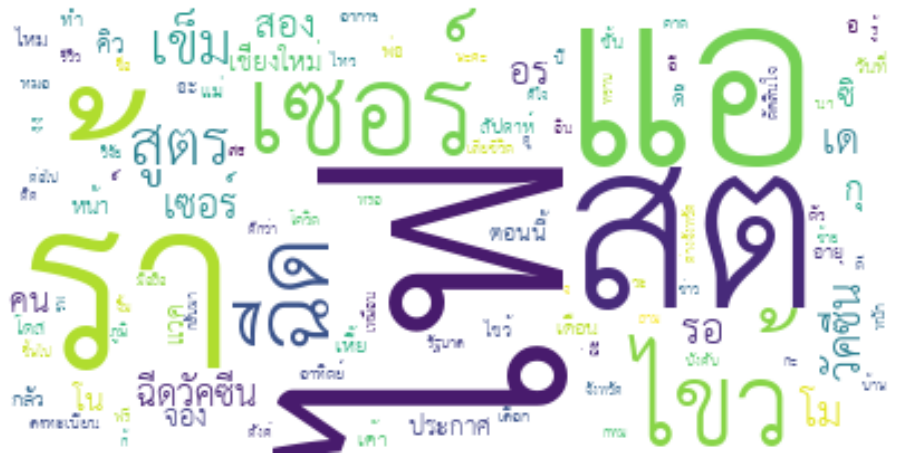

In [26]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path=path,background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [27]:
import requests
url = "https://api.aiforthai.in.th/ssense"

data = {'text':data3.iloc[0]}
headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
 
response = requests.post(url, data=data, headers=headers)


print(response.json())

{'sentiment': {'score': '0', 'polarity-neg': False, 'polarity-pos': False, 'polarity': ''}, 'preprocess': {'input': 'เด๋วพรุ่งนี้ไปตรวจ RT-PCR คิดว่าน่าจะติดกันหมดสามคนอยู่ เพียงแต่ของเราแทสไม่มีอาการเทียบกับอีกสองคนเพราะเรามดน.สองเข็ม อีกสองคนเป็นไขว้แอสตร้าไฟเซอร์', 'neg': [], 'pos': [], 'segmented': ['เด๋ว', 'พรุ่งนี้', 'ไป', 'ตรวจ', ' ', 'RT', '-', 'PCR', ' ', 'คิด', 'ว่า', 'น่าจะ', 'ติดกัน', 'หมด', 'สาม', 'คน', 'อยู่', ' ', 'เพียงแต่', 'ของ', 'เรา', 'แ', 'ทส', 'ไม่มี', 'อาการ', 'เทียบ', 'กับ', 'อีก', 'สอง', 'คน', 'เพราะ', 'เรา', 'มด', 'น.', 'สอง', 'เข็ม', ' ', 'อีก', 'สอง', 'คน', 'เป็น', 'ไขว้', 'แอ', 'สต', 'ร้า', 'ไฟ', 'เซอร์'], 'keyword': ['เด๋ว', 'พรุ่งนี้', 'ตรวจ', 'RT', 'PCR', 'คิด', 'น่าจะ', 'ติดกัน', 'หมด', 'สาม', 'คน', 'เพียงแต่', 'ทส', 'ไม่มี', 'อาการ', 'เทียบ', 'สอง', 'คน', 'มด', 'น.', 'สอง', 'เข็ม', 'สอง', 'คน', 'ไขว้', 'แอ', 'ร้า', 'ไฟ', 'เซอร์']}, 'alert': [], 'comparative': [], 'associative': [], 'intention': {'request': '0', 'sentiment': '0', 'question': '0', 'annou

In [28]:
import requests
import seaborn as sns
import pandas as pd
import json

for i in range(0,134):
  url = "https://api.aiforthai.in.th/ssense"
  data = {'text':data3.iloc[i]}
  headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
  response = requests.post(url, data=data, headers=headers)
  #print(response.json())
  j1 = json.loads(response.text)
  j2 = j1["sentiment"]
  j3 = j2["polarity"]

  print(j3)
  #sns.lineplot(j3)


positive

positive
negative
positive
negative

negative



negative
positive


negative
negative
negative

negative
negative

positive
positive
negative

negative
negative
positive

positive
negative
negative
negative
negative
negative

negative

positive
negative
positive

negative
positive
negative
negative
negative

positive

positive
negative
negative

positive
negative
negative


negative
negative

negative
negative

negative


negative
negative

negative

negative
positive
negative
positive


positive

negative
negative



negative

positive


positive
negative

positive
negative
negative

negative
negative


positive

negative



positive


negative
positive


positive
negative


KeyError: ignored

##Read result from analysis process

In [29]:
with open('/content/gdrive/MyDrive/CS701_src/output/astra_pfizer.txt', 'r') as f:
    #print(sum(line.count("negative") for line in f))
    output1 = (sum(line.count("negative") for line in f))

In [30]:
print(output1)

50


In [32]:
with open('/content/gdrive/MyDrive/CS701_src/output/astra_pfizer.txt', 'r') as f:
    #print(sum(line.count("positive") for line in f))
    output2 = (sum(line.count("positive") for line in f))

In [33]:
print(output2)

28


In [34]:
output3 = data3.size - (output1+output2)

In [35]:
print(output3)

56


In [36]:
final1 = [output2,output3,output1]

In [37]:
print(final1)

[28, 56, 50]


In [38]:
final2 = output2+output3+output1
print(final2)

134


In [39]:
final_out2 = output2*100/final2
final_out1 = output1*100/final2
final_out3 = output3*100/final2

In [40]:
print("percent of positive sentiment is "'{:.2f}'.format(final_out2))
print("percent of neutral sentiment is "'{:.2f}'.format(final_out3))
print("percent of negative sentiment is "'{:.2f}'.format(final_out1))

percent of positive sentiment is 20.90
percent of neutral sentiment is 41.79
percent of negative sentiment is 37.31


In [41]:
final_last = [final_out2,final_out3,final_out1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


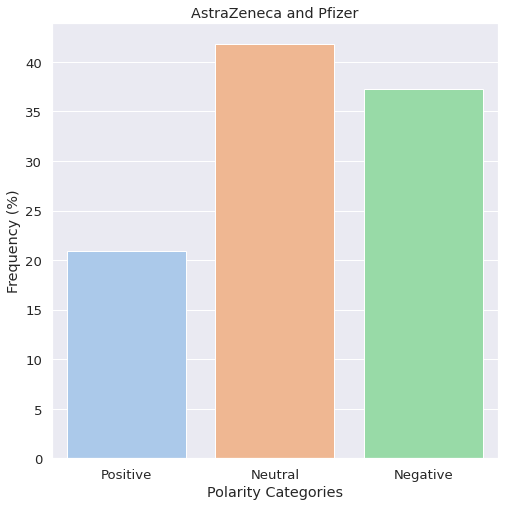

In [42]:
from google.colab import files

labels = ['Positive','Neutral','Negative']

#sns.set_style('ticks')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8, 8))
ax = sns.barplot(labels,final_last, palette = 'pastel')
ax.set(title="AstraZeneca and Pfizer")
plt.xlabel("Polarity Categories")
plt.ylabel("Frequency (%)")
plt.show()
#plt.savefig("astra_pfizer.png")
#files.download("astra_pfizer.png") 